# Miles Vincent 2019 Final Project 

# I started a new workbook instead of going off my midterm

### Most of these packages came from my midterm but some come from the homeworks 

In [599]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import SelectKBest
import statsmodels.formula.api as sm
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import f_regression

### Bringing in the data 

In [600]:
data = pd.read_csv("/Users/milesvincent/Desktop/movie_metadata.csv")
data.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


## Cleaning the data

In [601]:
# We create an array of all of the columns that we feel are important to keep. 
# We then set 'English' and 'USA' as a filler for null values in the dataframe. 

# This cleaning code is courtesy of https://github.com/tousif101/MoviePredictor/blob/master/movie_data_clean.py
import random

data = pd.read_csv("/Users/milesvincent/Desktop/movie_metadata.csv", index_col=False)

keep_col = ['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes',
            'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
            'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'language',
            'country', 'content_rating', 'budget', 'title_year', 'imdb_score', 'movie_facebook_likes']

new_file = data[keep_col]

new_data = new_file.fillna(new_file.mean())

new_data = new_data[new_data.language == 'English']
new_data = new_data[new_data.country == 'USA']

new_data = new_data[new_data.content_rating != 'TV-14']
new_data = new_data[new_data.content_rating != 'TV-PG']
new_data = new_data[new_data.content_rating != 'TV-MA']
new_data = new_data[new_data.content_rating != 'TV-G']
new_data = new_data[new_data.content_rating != 'TV-Y7']
new_data = new_data[new_data.content_rating != 'Passed']
new_data = new_data[new_data.content_rating != 'Approved']
new_data = new_data[new_data.content_rating != 'Not Rated']
new_data = new_data[new_data.content_rating != 'Unrated']
new_data = new_data[new_data.content_rating != 'NC-17']
new_data = new_data[pd.notnull(new_data['content_rating'])]

new_data = new_data.reset_index()

for i in range(0, len(new_data['genres'])):
    record = new_data.loc[i, 'genres']
    splitVal = record.split('|')
    val = random.choice(splitVal)
    new_data.iloc[i, new_data.columns.get_loc('genres')] = val

new_data = new_data.reset_index()

cleaned_data = new_data

cleaned_data.to_csv("cleaned_movie_metadata.csv",index =False)
df = cleaned_data

## Checking to make sure that data is all the same amount of variables

In [602]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 21 columns):
level_0                      3422 non-null int64
index                        3422 non-null int64
director_name                3422 non-null object
num_critic_for_reviews       3422 non-null float64
duration                     3422 non-null float64
director_facebook_likes      3422 non-null float64
actor_1_facebook_likes       3422 non-null float64
gross                        3422 non-null float64
genres                       3422 non-null object
actor_1_name                 3422 non-null object
movie_title                  3422 non-null object
num_voted_users              3422 non-null int64
cast_total_facebook_likes    3422 non-null int64
num_user_for_reviews         3422 non-null float64
language                     3422 non-null object
country                      3422 non-null object
content_rating               3422 non-null object
budget                       3422 non-nul

In [603]:
datac = df.dropna()
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3422 entries, 0 to 3421
Data columns (total 21 columns):
level_0                      3422 non-null int64
index                        3422 non-null int64
director_name                3422 non-null object
num_critic_for_reviews       3422 non-null float64
duration                     3422 non-null float64
director_facebook_likes      3422 non-null float64
actor_1_facebook_likes       3422 non-null float64
gross                        3422 non-null float64
genres                       3422 non-null object
actor_1_name                 3422 non-null object
movie_title                  3422 non-null object
num_voted_users              3422 non-null int64
cast_total_facebook_likes    3422 non-null int64
num_user_for_reviews         3422 non-null float64
language                     3422 non-null object
country                      3422 non-null object
content_rating               3422 non-null object
budget                       3422 non-nul

In [604]:
datac = datac.drop(['director_name'], axis=1)
datac.head()

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,0,0,723.0,178.0,0.0,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,1,1,302.0,169.0,563.0,40000.0,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,2,3,813.0,164.0,22000.0,27000.0,448130642.0,Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000
3,3,5,462.0,132.0,475.0,640.0,73058679.0,Adventure,Daryl Sabara,John Carter,212204,1873,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000
4,4,6,392.0,156.0,0.0,24000.0,336530303.0,Action,J.K. Simmons,Spider-Man 3,383056,46055,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,0


## Dropping data that is not needed for reggression and models so it is easier to work with. 

# Starting the Lasso model 

In [696]:
y = datac['imdb_score'] 
X = datac.drop(['actor_1_name', 'movie_title', 'language', 'country', 'content_rating', 'genres'], axis =1)
datac.head()

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,0,0,723.0,178.0,0.0,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,1,1,302.0,169.0,563.0,40000.0,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,2,3,813.0,164.0,22000.0,27000.0,448130642.0,Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000
3,3,5,462.0,132.0,475.0,640.0,73058679.0,Adventure,Daryl Sabara,John Carter,212204,1873,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000
4,4,6,392.0,156.0,0.0,24000.0,336530303.0,Action,J.K. Simmons,Spider-Man 3,383056,46055,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,0


# Lasso Model 

In [697]:
model1 = lm.Lasso(alpha=1)         #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

/Users/milesvincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766.782129769774, tolerance: 0.4088064573348919
  positive)


In [698]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [-2.67902098e-05  1.05730774e-04  2.63777726e-03  1.06405947e-02
  1.11941636e-05  1.00161297e-05 -1.49098137e-10  3.59949110e-06
 -6.85644047e-06 -5.19343371e-04 -2.93944255e-09 -1.14407993e-02
  0.00000000e+00 -3.52509499e-06]
y-intercept  27.448992278633682


In [608]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('level_0', '-0.000'),
 ('index', '0.000'),
 ('num_critic_for_reviews', '0.003'),
 ('duration', '0.011'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.011'),
 ('imdb_score', '0.000'),
 ('movie_facebook_likes', '-0.000')]

In [609]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7419909871660478
variance or r-squared:  0.3789009169191755


## running the stats model to fine an R-sqaured 

In [610]:
import statsmodels.formula.api as sm
# Stats Model 
#First Model
imdb_model1 = sm.ols("imdb_score~level_0+index+num_critic_for_reviews+duration+director_facebook_likes+actor_1_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+num_user_for_reviews+budget+title_year+movie_facebook_likes",datac)
imdb1 = imdb_model1.fit()
#Second Model
imdb_model3 = sm.ols("imdb_score~budget+movie_facebook_likes",datac)
imdb3 = imdb_model3.fit()

print(imdb1.summary())
print(imdb3.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     169.8
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:07:27   Log-Likelihood:                -4305.4
No. Observations:                3422   AIC:                             8639.
Df Residuals:                    3408   BIC:                             8725.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### we have a very low R-squared so that should indicate to us that this is not a very good model 

# Ridge Model 

In [611]:
model2 = lm.Ridge(alpha=0.1)             #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model1.predict(X)

/Users/milesvincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0506e-16): result may not be accurate.
  overwrite_a=True).T


In [612]:
model2

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [613]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('level_0', '-0.000'),
 ('index', '0.000'),
 ('num_critic_for_reviews', '0.003'),
 ('duration', '0.011'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.011'),
 ('imdb_score', '0.000'),
 ('movie_facebook_likes', '-0.000')]

In [614]:
# feature 
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.780000e+02, 8.862040e+05],
       [1.690000e+02, 4.712200e+05],
       [1.640000e+02, 1.144337e+06],
       ...,
       [8.400000e+01, 3.600000e+01],
       [1.000000e+02, 1.255000e+03],
       [9.000000e+01, 4.285000e+03]])

In [615]:
selector = SelectKBest(f_regression, k=4).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[2 3 7 9]


In [616]:
X.head(2)

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
0,0,0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,7.9,33000
1,1,1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,7.1,0


### Number of critic for review, duration, number of votes, and number user for review are the best 

## Linear Regression 

In [617]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.8525621604582408
variance or r-squared:  0.2863450024474228


# Model 2 does not have a very good r-sqaured so it will not be that good of a predictor 

In [618]:
import statsmodels.formula.api as sm
idbm_model5 = sm.ols("imdb_score~num_critic_for_reviews+duration+num_user_for_reviews+movie_facebook_likes",datac)
idbm5 = idbm_model5.fit()
print(idbm5.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     253.9
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          3.32e-191
Time:                        11:07:27   Log-Likelihood:                -4714.7
No. Observations:                3422   AIC:                             9439.
Df Residuals:                    3417   BIC:                             9470.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [619]:
X = datac['num_critic_for_reviews']
y = datac['duration'] 
model5= lm.LinearRegression()
model5.fit(X[:,np.newaxis], y)
model5_y = model5.predict(X[:,np.newaxis])
print ('Coefficients: ', model5.coef_)
print ("y-intercept ", model5.intercept_)

Coefficients:  [0.04992924]
y-intercept  100.63708838515292


In [620]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print ("mean square error: ", mean_squared_error(y, model5_y))
print ("variance or r-squared: ", explained_variance_score(y, model5_y))

mean square error:  6.227528941555377e-29
variance or r-squared:  1.0


# Corrolation Heat Map 

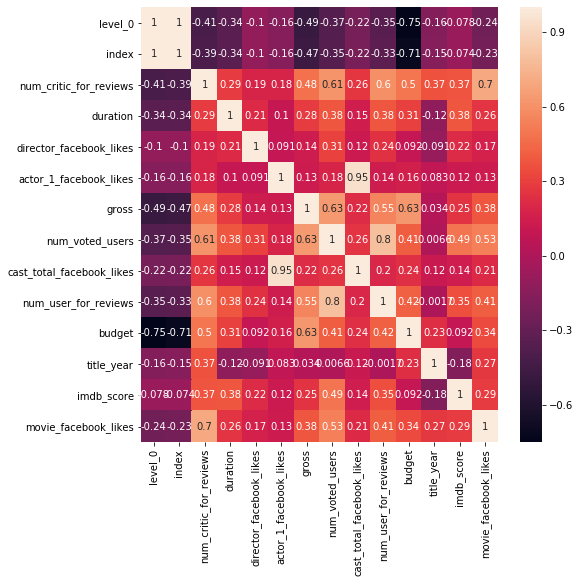

In [621]:
plt.figure(figsize=(8,8))
sns.heatmap(datac.corr(), annot=True)

In [622]:
df.head()

,level_0,index,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,0,0,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action,CCH Pounder,...,886204,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,1,1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action,Johnny Depp,...,471220,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,2,3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Thriller,Tom Hardy,...,1144337,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000
3,3,5,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Adventure,Daryl Sabara,...,212204,1873,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000
4,4,6,Sam Raimi,392.0,156.0,0.0,24000.0,336530303.0,Action,J.K. Simmons,...,383056,46055,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,0


# Adding a dumby variable so that we can have a category of 4 bins. Bad, Ok, Good, Excellent 

In [623]:
df5 = df
# setting my own values for bins
df5['imdbscore_category'] = pd.cut(df5['imdb_score'], bins=[0, 2, 4, 6, 8], labels=['bad','okay', 'good', 'excellent'])
# see the result
df5.head()

,level_0,index,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,...,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,imdbscore_category
0,0,0,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action,CCH Pounder,...,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000,excellent
1,1,1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action,Johnny Depp,...,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0,excellent
2,2,3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Thriller,Tom Hardy,...,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000,NaN
3,3,5,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Adventure,Daryl Sabara,...,1873,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000,excellent
4,4,6,Sam Raimi,392.0,156.0,0.0,24000.0,336530303.0,Action,J.K. Simmons,...,46055,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,0,excellent


In [624]:
y = df5['imdbscore_category']
X = df5.drop(["imdbscore_category"], axis=1)

print(y.shape, X.shape)

(3422,) (3422, 21)


In [625]:
df5 = df5.dropna()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3421
Data columns (total 22 columns):
level_0                      3297 non-null int64
index                        3297 non-null int64
director_name                3297 non-null object
num_critic_for_reviews       3297 non-null float64
duration                     3297 non-null float64
director_facebook_likes      3297 non-null float64
actor_1_facebook_likes       3297 non-null float64
gross                        3297 non-null float64
genres                       3297 non-null object
actor_1_name                 3297 non-null object
movie_title                  3297 non-null object
num_voted_users              3297 non-null int64
cast_total_facebook_likes    3297 non-null int64
num_user_for_reviews         3297 non-null float64
language                     3297 non-null object
country                      3297 non-null object
content_rating               3297 non-null object
budget                       3297 non-nul

In [626]:
df5 = df5.drop(['director_name', 'genres', 'actor_1_name', 'movie_title', 'language', 'country', 'content_rating'], axis = 1)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3421
Data columns (total 15 columns):
level_0                      3297 non-null int64
index                        3297 non-null int64
num_critic_for_reviews       3297 non-null float64
duration                     3297 non-null float64
director_facebook_likes      3297 non-null float64
actor_1_facebook_likes       3297 non-null float64
gross                        3297 non-null float64
num_voted_users              3297 non-null int64
cast_total_facebook_likes    3297 non-null int64
num_user_for_reviews         3297 non-null float64
budget                       3297 non-null float64
title_year                   3297 non-null float64
imdb_score                   3297 non-null float64
movie_facebook_likes         3297 non-null int64
imdbscore_category           3297 non-null category
dtypes: category(1), float64(9), int64(5)
memory usage: 389.8 KB


In [627]:
df5 = df5.dropna()
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3421
Data columns (total 15 columns):
level_0                      3297 non-null int64
index                        3297 non-null int64
num_critic_for_reviews       3297 non-null float64
duration                     3297 non-null float64
director_facebook_likes      3297 non-null float64
actor_1_facebook_likes       3297 non-null float64
gross                        3297 non-null float64
num_voted_users              3297 non-null int64
cast_total_facebook_likes    3297 non-null int64
num_user_for_reviews         3297 non-null float64
budget                       3297 non-null float64
title_year                   3297 non-null float64
imdb_score                   3297 non-null float64
movie_facebook_likes         3297 non-null int64
imdbscore_category           3297 non-null category
dtypes: category(1), float64(9), int64(5)
memory usage: 389.8 KB


,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,imdbscore_category
0,0,0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,7.9,33000,excellent
1,1,1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,7.1,0,excellent
3,3,5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,6.6,24000,excellent
4,4,6,392.0,156.0,0.0,24000.0,336530303.0,383056,46055,1902.0,258000000.0,2007.0,6.2,0,excellent
5,5,7,324.0,100.0,15.0,799.0,200807262.0,294810,2036,387.0,260000000.0,2010.0,7.8,29000,excellent


# Running decision tree models

### The next 5 sections of code are all part of the decision tree model. A desision tree is a lo like a flow chart with each stop having a rule. This can be used for both classification and regression. 

In [628]:
y = df5['imdbscore_category']
X = df5.drop(["imdbscore_category"], axis=1)

print(y.shape, X.shape)

(3297,) (3297, 14)


In [629]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt= DecisionTreeClassifier()

# Train a decision tree model
dt=dt.fit(X_train, y_train)


In [630]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [631]:
df5.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3421
Data columns (total 15 columns):
level_0                      3297 non-null int64
index                        3297 non-null int64
num_critic_for_reviews       3297 non-null float64
duration                     3297 non-null float64
director_facebook_likes      3297 non-null float64
actor_1_facebook_likes       3297 non-null float64
gross                        3297 non-null float64
num_voted_users              3297 non-null int64
cast_total_facebook_likes    3297 non-null int64
num_user_for_reviews         3297 non-null float64
budget                       3297 non-null float64
title_year                   3297 non-null float64
imdb_score                   3297 non-null float64
movie_facebook_likes         3297 non-null int64
imdbscore_category           3297 non-null category
dtypes: category(1), float64(9), int64(5)
memory usage: 389.8 KB


In [632]:
y = df5['imdbscore_category']
X = df5.drop(['imdbscore_category'], axis=1)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3421
Data columns (total 15 columns):
level_0                      3297 non-null int64
index                        3297 non-null int64
num_critic_for_reviews       3297 non-null float64
duration                     3297 non-null float64
director_facebook_likes      3297 non-null float64
actor_1_facebook_likes       3297 non-null float64
gross                        3297 non-null float64
num_voted_users              3297 non-null int64
cast_total_facebook_likes    3297 non-null int64
num_user_for_reviews         3297 non-null float64
budget                       3297 non-null float64
title_year                   3297 non-null float64
imdb_score                   3297 non-null float64
movie_facebook_likes         3297 non-null int64
imdbscore_category           3297 non-null category
dtypes: category(1), float64(9), int64(5)
memory usage: 389.8 KB


In [633]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr= LogisticRegression()

lr.fit(X_train, y_train)

/Users/milesvincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/milesvincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [634]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))


1.0
--------------------------------------------------------
[[  3   0   0   0]
 [  0 653   0   0]
 [  0   0 308   0]
 [  0   0   0  26]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00         3
   excellent       1.00      1.00      1.00       653
        good       1.00      1.00      1.00       308
        okay       1.00      1.00      1.00        26

    accuracy                           1.00       990
   macro avg       1.00      1.00      1.00       990
weighted avg       1.00      1.00      1.00       990

--------------------------------------------------------


ValueError: multiclass format is not supported

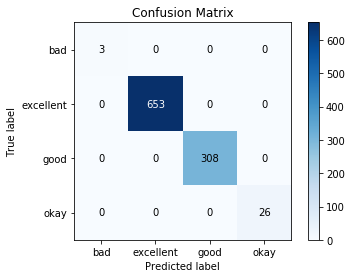

In [635]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [636]:
# dt = DecisionTreeClassifier()    # develop a very complex ("full-grown") tree

# You can make a simpler decision tree ... name the model "dt_simple" (max_depth=3, min_samples_leaf=5)


# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt_simple= DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt_simple=dt_simple.fit(X_train, y_train)

dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [637]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test)))
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))

1.0
[[  2   0   0   0]
 [  0 637   0   0]
 [  0   0 329   0]
 [  0   0   0  22]]
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00         2
   excellent       1.00      1.00      1.00       637
        good       1.00      1.00      1.00       329
        okay       1.00      1.00      1.00        22

    accuracy                           1.00       990
   macro avg       1.00      1.00      1.00       990
weighted avg       1.00      1.00      1.00       990



ValueError: multiclass format is not supported

# Random forrest regression Model 

## Random Forrest is very similar to the decision tree model in the fact that it can be used for both classification and Reggression 

In [638]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9949494949494949

In [639]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9949494949494949
[[  0   0   1   1]
 [  0 637   0   0]
 [  0   0 329   0]
 [  0   0   3  19]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         2
   excellent       1.00      1.00      1.00       637
        good       0.99      1.00      0.99       329
        okay       0.95      0.86      0.90        22

    accuracy                           0.99       990
   macro avg       0.73      0.72      0.72       990
weighted avg       0.99      0.99      0.99       990



/Users/milesvincent/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [640]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
knn= KNeighborsClassifier()

# Train a decision tree model
knn=knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [641]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

1.0
--------------------------------------------------------
[[  2   0   0   0]
 [  0 637   0   0]
 [  0   0 329   0]
 [  0   0   0  22]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00         2
   excellent       1.00      1.00      1.00       637
        good       1.00      1.00      1.00       329
        okay       1.00      1.00      1.00        22

    accuracy                           1.00       990
   macro avg       1.00      1.00      1.00       990
weighted avg       1.00      1.00      1.00       990

--------------------------------------------------------


ValueError: multiclass format is not supported

## Logistic regressions

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

/Users/milesvincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [643]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[7.60505847e+08 8.86204000e+05 2.37000000e+08]
 [3.09404152e+08 4.71220000e+05 3.00000000e+08]
 [7.30586790e+07 2.12204000e+05 2.63700000e+08]
 ...
 [4.84684075e+07 3.60000000e+01 3.25000000e+03]
 [1.04430000e+04 1.25500000e+03 3.97526204e+07]
 [8.52220000e+04 4.28500000e+03 1.10000000e+03]]


# The predictors for this model 

In [644]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 6  7 10]


In [645]:
X.head() # the best indicators according to this model are satisfaction level, average monthly hours, and time work accident 

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
0,0,0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,7.9,33000
1,1,1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,7.1,0
3,3,5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,6.6,24000
4,4,6,392.0,156.0,0.0,24000.0,336530303.0,383056,46055,1902.0,258000000.0,2007.0,6.2,0
5,5,7,324.0,100.0,15.0,799.0,200807262.0,294810,2036,387.0,260000000.0,2010.0,7.8,29000


# Neural network

In [646]:
from sklearn.neural_network import MLPClassifier
>>> X = [[0., 0.], [1., 1.]]
>>> y = [0, 1]
>>> clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)
...
>>> clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [647]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [648]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [649]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

In [650]:
X = [[0., 0.], [1., 1.]]
>>> y = [[0, 1], [1, 1]]
>>> clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(15,), random_state=1)
...
clf.fit(X, y)   

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# Normalizing Data 

## we will normally do this if we are afraid of redundancy in our data. We need to make sure that the catagory data is not included in the normalization process  

In [699]:
df2 = df2.drop("imdbscore_category", axis=1)
df2.head()

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,cluster
0,0,0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,7.9,33000,2.0
1,1,1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,7.1,0,2.0
3,3,5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,6.6,24000,2.0
4,4,6,392.0,156.0,0.0,24000.0,336530303.0,383056,46055,1902.0,258000000.0,2007.0,6.2,0,2.0
5,5,7,324.0,100.0,15.0,799.0,200807262.0,294810,2036,387.0,260000000.0,2010.0,7.8,29000,2.0


In [700]:
df_nor = (df2 - df2.mean()) / (df2.max() - df2.min())
df_nor.head(1)

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,cluster
0,-0.50181,-0.452858,0.738488,0.239194,-0.031867,-0.010721,0.929308,0.906743,-0.010422,0.770524,0.659923,0.074567,0.255896,0.12933,-0.037984


In [701]:
df_nor.var()

level_0                      0.082632
index                        0.079697
num_critic_for_reviews       0.023427
duration                     0.004846
director_facebook_likes      0.015558
actor_1_facebook_likes       0.000676
gross                        0.007004
num_voted_users              0.013072
cast_total_facebook_likes    0.000920
num_user_for_reviews         0.008464
budget                       0.019011
title_year                   0.015157
imdb_score                   0.025857
movie_facebook_likes         0.008152
cluster                      0.125375
dtype: float64

# K-Means & Clustering 

In [654]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward


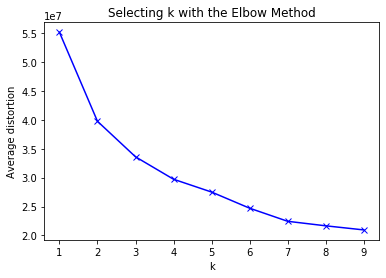

In [673]:
from scipy.spatial.distance import cdist 
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#
#http://scikit-learn.org/stable/modules/clustering.html

K = list(range(1, 10)) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

#the graph suggest that 6 or 7 is a good value for K
#The average distortion improves rapidly as we increase  from 1 to 2 and 2 to 3. 
#There is little improvement for values of  greater than 7.

In [674]:
k_means = KMeans(init='k-means++', n_clusters=6, random_state=0)

In [675]:
k_means.fit(df_nor)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [676]:
k_means.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [677]:
k_means.cluster_centers_

array([[ 0.3899506 ,  0.40364331, -0.07022908, -0.03413991, -0.01905123,
        -0.00543034, -0.03945978, -0.06100401, -0.00842515, -0.03640455,
        -0.09380867, -0.01408374, -0.0213077 , -0.02174261],
       [-0.102708  , -0.11535236, -0.01326643,  0.00685701, -0.02459553,
         0.00164988, -0.01204915, -0.01407912,  0.00161788, -0.01172745,
        -0.02267732,  0.00384571, -0.01100968, -0.01245252],
       [-0.38633949, -0.35215642,  0.32710663,  0.06455802,  0.01920123,
         0.01088502,  0.16642049,  0.26256957,  0.01981021,  0.17202752,
         0.28384861,  0.08947655,  0.11385485,  0.18542624],
       [ 0.15747876,  0.13024188, -0.04175716, -0.01356675, -0.02440179,
        -0.003205  , -0.02966974, -0.03280959, -0.0043943 , -0.0207888 ,
        -0.07445107, -0.01898051, -0.00576262, -0.01455384],
       [-0.10965935, -0.11323554,  0.04977578,  0.05223539,  0.59466914,
         0.00759168,  0.02604343,  0.07176775,  0.00873176,  0.03532423,
         0.01594533, -0.06

In [678]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,2
2,2
3,2
4,2


In [679]:
df2 = df.join(df1)
df2.head()

,level_0,index,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,imdbscore_category,cluster
0,0,0,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000,excellent,2.0
1,1,1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0,excellent,2.0
2,2,3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000,NaN,2.0
3,3,5,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Adventure,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000,excellent,2.0
4,4,6,Sam Raimi,392.0,156.0,0.0,24000.0,336530303.0,Action,J.K. Simmons,...,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,0,excellent,2.0


In [680]:
df2.groupby(['cluster']).size()

cluster
0.0    712
1.0    822
2.0    229
3.0    802
4.0    106
5.0    626
dtype: int64

In [681]:
df2.groupby('cluster').mean()

,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,,,,
0.0,2938.271067,4069.710674,105.839261,100.140732,571.476124,4743.522472,2.506723e+07,45452.838483,6872.898876,188.294622,9.794446e+06,2000.992978,6.280337,4329.168539
1.0,1305.565693,1589.489051,156.218978,111.272506,910.266423,9117.416058,4.944791e+07,95822.373479,13074.136253,285.908759,3.315570e+07,2003.400243,6.351338,7809.074209
2.0,372.899563,445.877729,282.624454,121.624454,1122.947598,12614.375546,1.488371e+08,223617.305677,21090.475983,678.218341,1.226592e+08,2007.034934,6.537555,26764.737991
3.0,2166.402743,2770.534913,124.852868,104.483791,662.047382,6319.615960,3.445289e+07,68585.077307,9274.586035,229.198254,1.738188e+07,2001.845387,6.265586,6012.577307
4.0,1283.952830,1598.839623,165.113208,110.066038,430.188679,9523.641509,6.225460e+07,98728.858491,14133.235849,326.471698,4.184960e+07,2004.009434,6.187736,9510.952830
5.0,494.063898,577.169329,208.218850,116.362620,1478.030351,10445.233227,9.821740e+07,172186.565495,16045.864217,474.744409,7.935157e+07,2004.726837,6.440256,12400.848243


## there are a lot of interesting things when we look at the averages above. first when you look at cluster two you will notice that the number of critics reviews is much higher. then when you compare this to the imdb scores you see that cluster two has the highest scores. Cluster two also has the most facebook likes of any cluster as well. The average duration for cluster 2 is 120 which is right at two hours which is also the longest. 

In [683]:
dfmean['imdb_score']

cluster
0.0    6.280337
1.0    6.351338
2.0    6.537555
3.0    6.265586
4.0    6.187736
5.0    6.440256
Name: imdb_score, dtype: float64

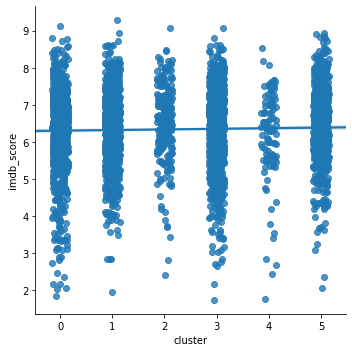

In [684]:
sns.lmplot("cluster", "imdb_score", df2, x_jitter=.15, y_jitter=.15)

In [685]:
dfmean['duration']

cluster
0.0    100.140732
1.0    111.272506
2.0    121.624454
3.0    104.483791
4.0    110.066038
5.0    116.362620
Name: duration, dtype: float64

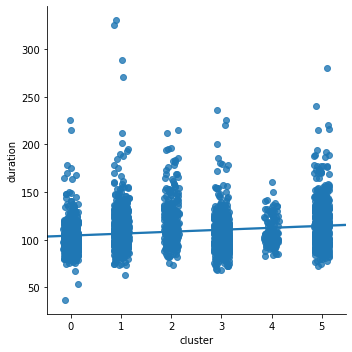

In [686]:
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

In [687]:
df2 = df2.dropna()
df2 = df2.drop(['director_name', 'genres', 'actor_1_name', 'movie_title', 'language', 'country', 'content_rating'], axis = 1)
df2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3175 entries, 0 to 3296
Data columns (total 16 columns):
level_0                      3175 non-null int64
index                        3175 non-null int64
num_critic_for_reviews       3175 non-null float64
duration                     3175 non-null float64
director_facebook_likes      3175 non-null float64
actor_1_facebook_likes       3175 non-null float64
gross                        3175 non-null float64
num_voted_users              3175 non-null int64
cast_total_facebook_likes    3175 non-null int64
num_user_for_reviews         3175 non-null float64
budget                       3175 non-null float64
title_year                   3175 non-null float64
imdb_score                   3175 non-null float64
movie_facebook_likes         3175 non-null int64
imdbscore_category           3175 non-null category
cluster                      3175 non-null float64
dtypes: category(1), float64(10), int64(5)
memory usage: 400.2 KB


In [703]:
y = df2['cluster'].values
X = df2.drop(['cluster',], axis=1)
X.head(1)


,level_0,index,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
0,0,0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,7.9,33000


In [704]:
from sklearn.tree import DecisionTreeClassifier
# instantiate a decision tree model, and fit with X and y
model = DecisionTreeClassifier()

model = model.fit(X, y)    

model.score(X, y)

1.0

In [705]:
predicted_Y = model.predict(X)
print (predicted_Y)

[2. 2. 2. ... 0. 0. 0.]


In [706]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X, y)
clf.score(X,y)

0.9952755905511811

## these are showing the importance factor of each variable 

In [692]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,level_0,0.345196
1,index,0.278220
2,num_critic_for_reviews,0.022283
3,duration,0.020474
4,director_facebook_likes,0.016535
5,actor_1_facebook_likes,0.016355
6,gross,0.037594
7,num_voted_users,0.026739
8,cast_total_facebook_likes,0.021555
9,num_user_for_reviews,0.024489


In [693]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X) #'ward' is hierarchical algorithm
agg.labels_

array([1, 1, 1, ..., 0, 0, 0])

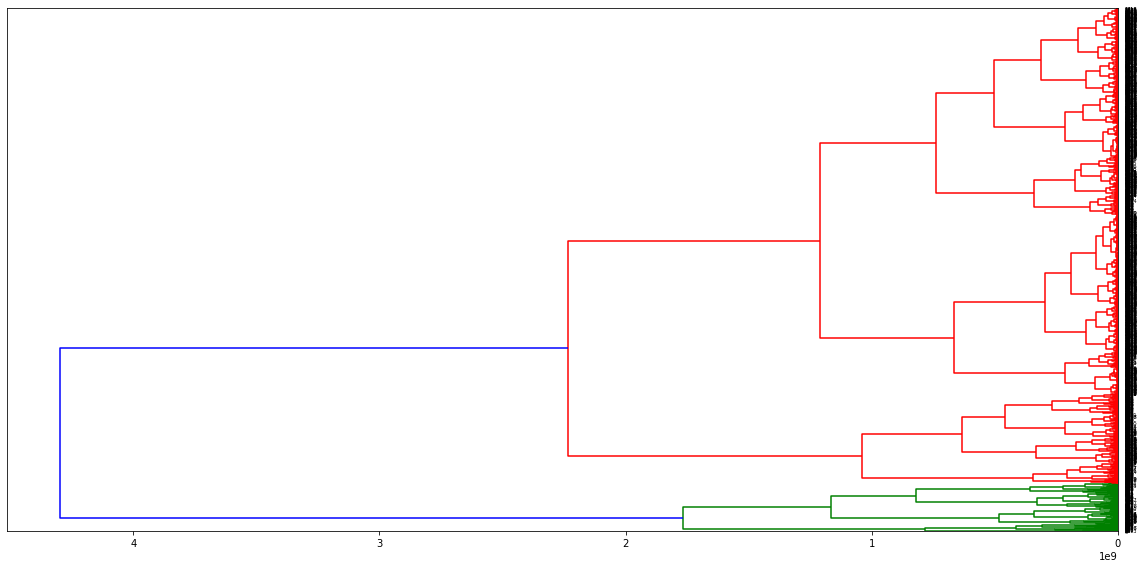

In [694]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() 

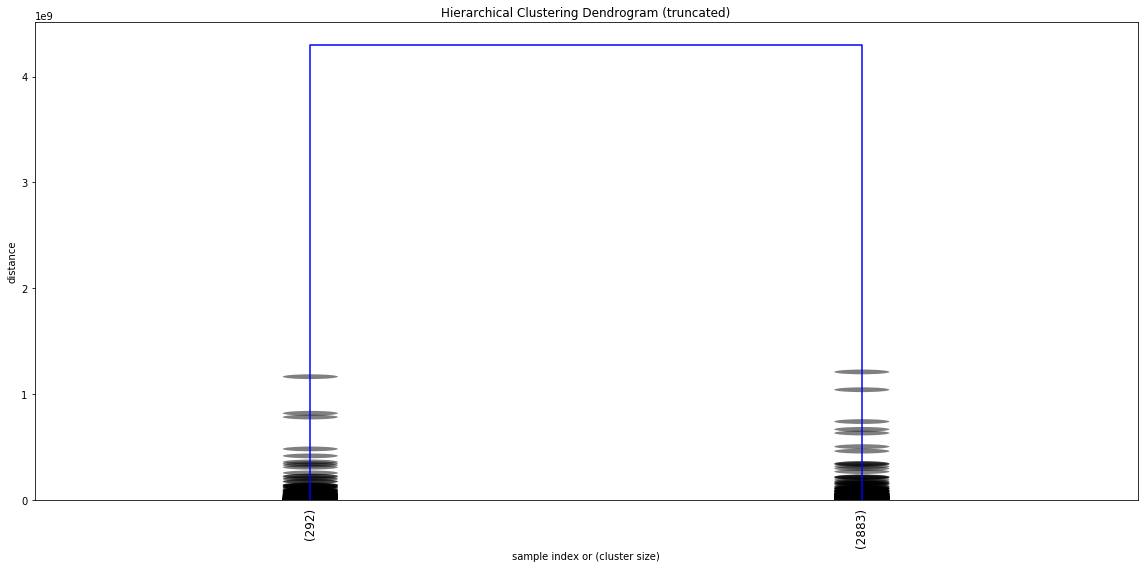

In [695]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

# Story telling 

## this is very interesting data. most of my models had very low R-Squareds which would indictate that we need more or diffrent data to work with. the data that I did use though showed both similaities and diffreneces to my mid term project. In particular one thing I found very interesting was that when looking at clustering of the imdb score the average for this is a good moive or a score between 6 and 8. This is interesting because I think it tells us that Hollywood and the movie executives are actually doing a pretty good job to began with. 

## Basicallly if you want to have a successful movie the first driver that I would look at is social media interactions. My models showed that when trying to predict if a movie is going to have sucsess this is a very important factor. I also think this makes sense because if it is getting a lot of interactions on social media that means a lot of people are aware of the movie. I would advise movie studios to invest heavly in socail media and try to drive interactions with movie goers through social media.   

## The second factor I found interesting was the duration was a key part in determining if a movie would be successful for not. This is the same as my predictions in my midterm. I think this makes sense because as a film studio you need to hit the sweet spot. To short and people will not justify buying the ticket to go and see it and it actually has a negative effect because people do not what to spend three hours in a movie theater. Based off the Clustering data I would say that the sweet spot is bewteen 90 and 120 minutes. 

## I believe that if you combine both duration and social media interaction then you will have a good change of predicting wheather or not a movie will indeed be successful or if it will be a bust

In [ ]:
conda install -c conda-forge rise